#  EDA & Visualization 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization</a></span><ul class="toc-item"><li><span><a href="#overlap-words-(percentage)---top-20" data-toc-modified-id="overlap-words-(percentage)---top-20-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>overlap words (percentage) - top 20</a></span></li><li><span><a href="#Top-50-words" data-toc-modified-id="Top-50-words-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Top 50 words</a></span></li><li><span><a href="#Top-100-disaster-words" data-toc-modified-id="Top-100-disaster-words-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Top 100 disaster words</a></span></li><li><span><a href="#Top-200-frequect-disaster-words" data-toc-modified-id="Top-200-frequect-disaster-words-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Top 200 frequect disaster words</a></span></li></ul></li></ul></div>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
import pickle
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [16]:
custom_stop_words_final = pickle.load( open( "save.p", "rb" ) )

df = pd.read_csv('../data/balanced_df_tokenized_lemmatized.csv')
df.head(3)

,author,content,description,publishedAt,source,source_id,source_name,title,types,url,urlToImage,yes_disaster
0,"Deanna Hackney, CNN",cnn crew from multiple missouri agency are on ...,crew from multiple missouri agency are on the ...,2018-07-20T02:06:39Z,"{'id': 'cnn', 'name': 'CNN'}",cnn,CNN,people hospitalized after missouri tourist boa...,casualty,https://www.cnn.com/2018/07/19/us/missouri-boa...,https://cdn.cnn.com/cnnnext/dam/assets/1503250...,1
1,Stine Jacobsen,reuters iceland s wow air became the latest b...,iceland s wow air became the latest budget air...,2019-03-28T13:29:26Z,"{'id': 'reuters', 'name': 'Reuters'}",reuters,Reuters,passenger stranded after iceland s wow air col...,casualty,https://www.reuters.com/article/us-wow-air-fli...,https://s4.reutersmedia.net/resources/r/?m=02&...,1
2,RICHARD A. OPPEL Jr.,mr doyen wrote that the shooting appears to h...,mgm resort international which owns the manda...,2018-07-18T00:30:05Z,"{'id': 'the-new-york-times', 'name': 'The New ...",the-new-york-times,The New York Times,mgm resort sue victim of la vega shooting s...,casualty,https://www.nytimes.com/2018/07/17/us/mgm-reso...,https://static01.nyt.com/images/2018/07/18/us/...,1


In [17]:
df.shape

(11102, 12)

## EDA

The only 3 columns that are useful for our NLP are title, description, and content, therefore I removed all others

In [18]:
df = df[['title', 'description','content','yes_disaster']]

In [19]:
df.head()

,title,description,content,yes_disaster
0,people hospitalized after missouri tourist boa...,crew from multiple missouri agency are on the ...,cnn crew from multiple missouri agency are on ...,1
1,passenger stranded after iceland s wow air col...,iceland s wow air became the latest budget air...,reuters iceland s wow air became the latest b...,1
2,mgm resort sue victim of la vega shooting s...,mgm resort international which owns the manda...,mr doyen wrote that the shooting appears to h...,1
3,santa fe high school multiple fatality repor...,the school district ha confirmed people were i...,image copyright twitter hcsotexas image capti...,1
4,ied blast in kashmir km from pulwama terror a...,ied blast in kashmir km from pulwama terror a...,an improvised explosive device ied went off in...,1


In [20]:
df['yes_disaster'].value_counts()

1    5551
0    5551
Name: yes_disaster, dtype: int64

In [21]:
df.isnull().sum()

title           5
description     7
content         1
yes_disaster    0
dtype: int64

Since the missing value is not a significant large number, I choose to replace them with ' '

In [22]:
df.fillna('', inplace = True)

Create a new column in my dataframe that contains all the words in 3 columns in order to do the following NLP

In [23]:
df['words'] = df['title'] + df['description'] + df['content']

In [24]:
df.head()

,title,description,content,yes_disaster,words
0,people hospitalized after missouri tourist boa...,crew from multiple missouri agency are on the ...,cnn crew from multiple missouri agency are on ...,1,people hospitalized after missouri tourist boa...
1,passenger stranded after iceland s wow air col...,iceland s wow air became the latest budget air...,reuters iceland s wow air became the latest b...,1,passenger stranded after iceland s wow air col...
2,mgm resort sue victim of la vega shooting s...,mgm resort international which owns the manda...,mr doyen wrote that the shooting appears to h...,1,mgm resort sue victim of la vega shooting s...
3,santa fe high school multiple fatality repor...,the school district ha confirmed people were i...,image copyright twitter hcsotexas image capti...,1,santa fe high school multiple fatality repor...
4,ied blast in kashmir km from pulwama terror a...,ied blast in kashmir km from pulwama terror a...,an improvised explosive device ied went off in...,1,ied blast in kashmir km from pulwama terror a...


In [25]:
df['words'][0]

'people hospitalized after missouri tourist boat incidentcrew from multiple missouri agency are on the scene of a mass casualty incident with a touristtype boat involved  the stone county fire department said in a statement cnn crew from multiple missouri agency are on the scene of a mass casualty incident with a touristtype boat involved  the stone county fire department said in a statement  several people were taken to a hospital  the department said  without elaborating on their condition  the incident took place on table rock lake near branson  diver are on scene  official said  developing story  more to come'

## Visualization 

In [26]:
len(custom_stop_words_final)

2490

In [27]:
def ngram_bar_plot(df, column, n_grams, n_words, stopword_toggle, disaster, filename=None):
    '''
    This function takes my dataframe and the specific column in my dataframe, 
    vectorize the content in that specific column
    into series of counted numbers of each words, and then put it 
    back into another dataframe , sum all the times that each 
    words appeared in that specific column, and sort them by descending 
    order, and then plot them into a barchart. 
    '''
    
    if stopword_toggle == True:
        cvec = CountVectorizer(stop_words = custom_stop_words_final,
                              ngram_range= (n_grams, n_grams),
                              min_df = 5
                              )
        words_cvec = cvec.fit_transform(column)
        df_cvec = pd.DataFrame(words_cvec.toarray(), columns = cvec.get_feature_names())
        df_cvec['yes_disaster'] = df['yes_disaster']
        Disaster = df_cvec[df_cvec['yes_disaster'] == disaster].sum().sort_values(ascending = False).head(n_words)
        sorted_disaster_index = Disaster[Disaster.index != 'yes_disaster'].index
        sorted_disaster_values = Disaster[Disaster.index != 'yes_disaster'].values

        
        plot = plt.figure(figsize = (15,8))
        plot = sns.barplot(x = sorted_disaster_index,
                           y = sorted_disaster_values).set_title(f'{n_words} Most Frequent Words... Disaster=={disaster}',
                                                                 fontsize = 20)  
        plot = plt.xticks(rotation=315)
        
        if filename:
            plt.savefig(f'../plots/{filename}.jpg', bbox_inches='tight')
        
        return plot,sorted_disaster_index

    else:
        cvec = CountVectorizer(
                            ngram_range= (n_grams,n_grams),
                            min_df= 5).fit(column)
        words_cvec = cvec.transform(column)
        df_cvec = pd.DataFrame(words_cvec.toarray(), columns = cvec.get_feature_names())
        df_cvec['yes_disaster'] = df['yes_disaster']
        Disaster = df_cvec[df_cvec['yes_disaster'] == disaster].sum().sort_values(ascending = False).head(n_words)
        sorted_disaster_index = Disaster[Disaster.index != 'yes_disaster'].index
        sorted_disaster_values = Disaster[Disaster.index != 'yes_disaster'].values

        
        plot = plt.figure(figsize = (15,8))
        plot = sns.barplot(x = sorted_disaster_index,
                           y = sorted_disaster_values).set_title(f'{n_words} Most Frequent Words... Disaster=={disaster}', fontsize = 20)
        plot = plt.xticks(rotation= 315)
        
        if filename:
            plt.savefig(f'../plots/{filename}.jpg', bbox_inches='tight')
       
        return plot, sorted_disaster_index
    

Use my ngram_bar_plot function to plot the most 20 frequent words in the content(words column in my dataframe)

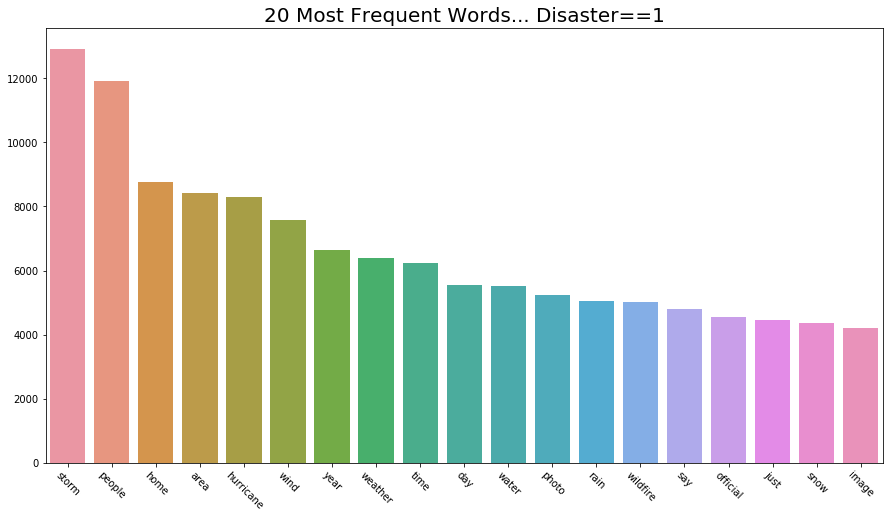

In [28]:
top20words_disaster_1 = ngram_bar_plot(df       = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 20,
                                       stopword_toggle = True,
                                       disaster = 1,
                                       filename = 'top20_most_freq_wds_disaster_1'
                                      )

In [29]:
type(top20words_disaster_1)

tuple

Generate a list that contains the 20 most frequent words when there is a natural disaster

In [30]:
top20words_disaster_1_list = list((top20words_disaster_1)[1])
top20words_disaster_1_list

['storm',
 'people',
 'home',
 'area',
 'hurricane',
 'wind',
 'year',
 'weather',
 'time',
 'day',
 'water',
 'photo',
 'rain',
 'wildfire',
 'say',
 'official',
 'just',
 'snow',
 'image']

Generate a list that contains the 20 most frequent words when there isn't a natural disaster

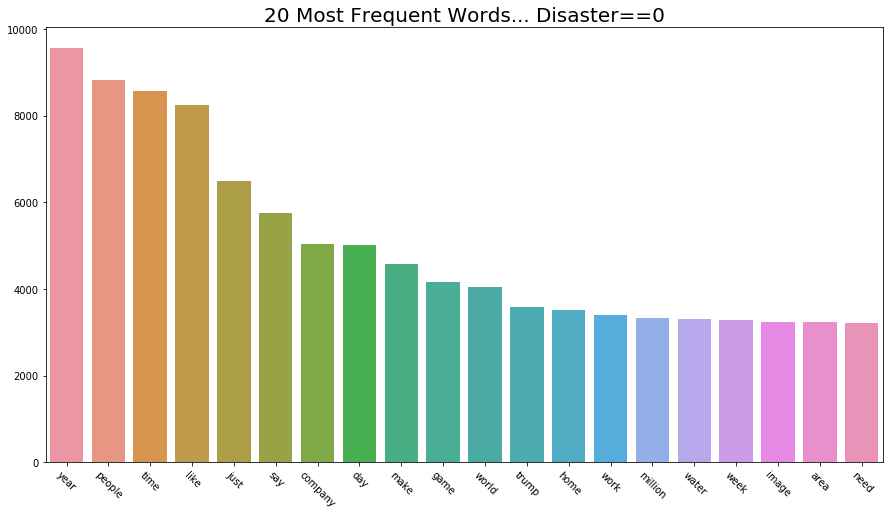

In [31]:
top20words_disaster_0 = ngram_bar_plot(df       = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 20,
                                       stopword_toggle = True,
                                       disaster = 0,
                                       filename = 'top20_most_freq_wds_disaster_0'
                                      )

Generate a Word Cloud to better show which words occurred

In [32]:
# from Andreas Mueller's code, via StackOverflow
# https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python


def gen_wordcloud(data, title=None, filename=None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=5
    ).generate(str(data))

    fig = plt.figure(1, figsize=(16, 16))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=32, color='r')
        fig.subplots_adjust(top=1.33)
    plt.imshow(wordcloud)
    
    if filename:
        plt.savefig(f'../plots/{filename}.jpg', bbox_inches='tight')

    plt.show();

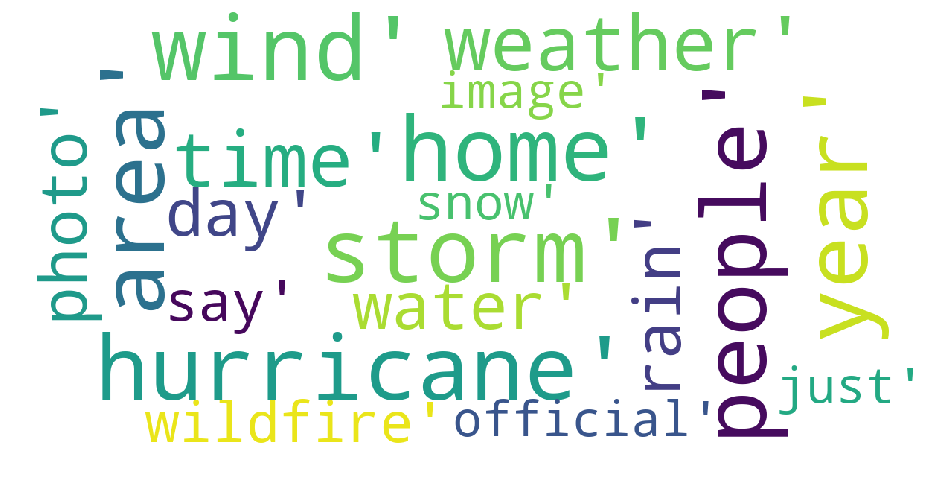

In [33]:
gen_wordcloud(top20words_disaster_1_list,
#               title='Top frequent words',
              filename='top20words_disaster_1_wordcloud.jpg'
             )

In [34]:
top20words_disaster_0_list = list((top20words_disaster_0)[1])
top20words_disaster_0_list

['year',
 'people',
 'time',
 'like',
 'just',
 'say',
 'company',
 'day',
 'make',
 'game',
 'world',
 'trump',
 'home',
 'work',
 'million',
 'water',
 'week',
 'image',
 'area',
 'need']

### overlap words (percentage) - top 20

In [35]:
top20_words_overlap = [w for w in top20words_disaster_1_list if w in top20words_disaster_0_list]
top20_wd_overlap_percentage = len(top20_words_overlap)/len(top20words_disaster_1_list)

print(top20_wd_overlap_percentage)
print(top20_words_overlap[:10])

0.5263157894736842
['people', 'home', 'area', 'year', 'time', 'day', 'water', 'say', 'just', 'image']


### Top 50 words

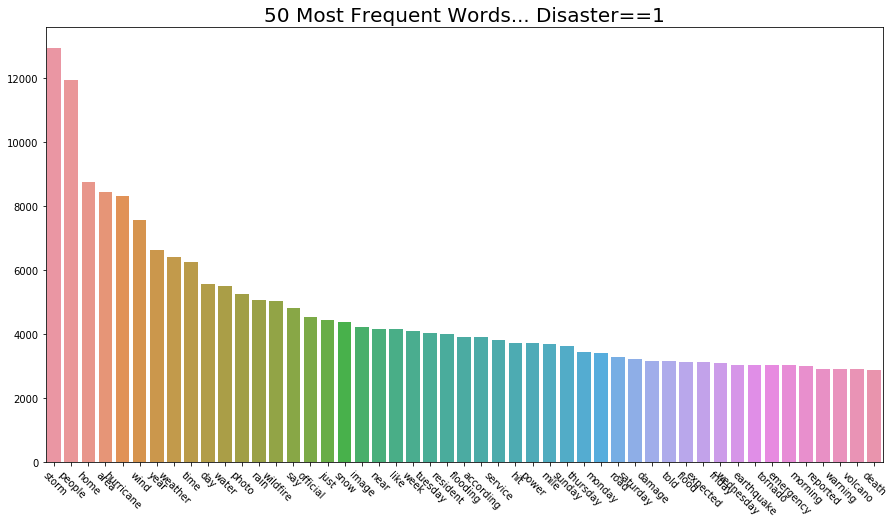

In [36]:
top50words_disaster_1 = ngram_bar_plot(df       = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 50,
                                       stopword_toggle = True,
                                       disaster = 1,
                                       filename = 'top50_most_freq_wds_disaster_1'
                                      )

In [37]:
top50words_disaster_1_list = list((top50words_disaster_1)[1])
top50words_disaster_1_list[:10]

['storm',
 'people',
 'home',
 'area',
 'hurricane',
 'wind',
 'year',
 'weather',
 'time',
 'day']

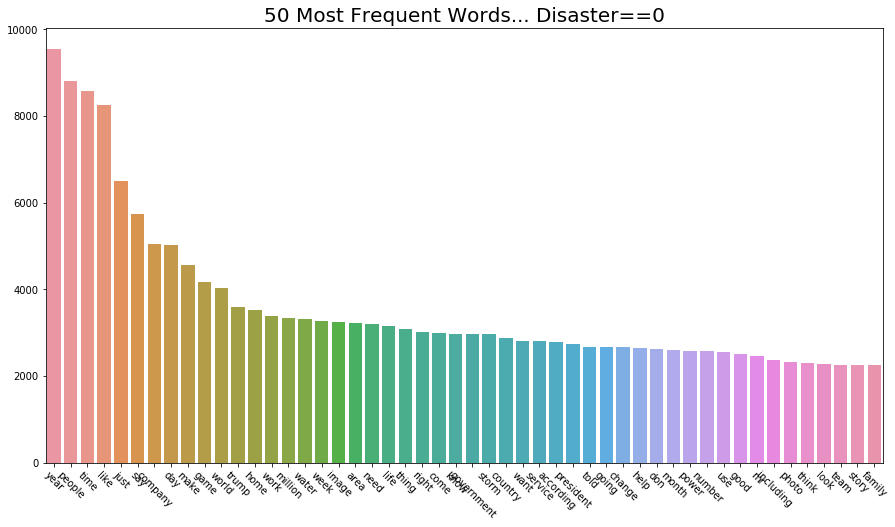

In [38]:
top50words_disaster_0 = ngram_bar_plot(df       = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 50,
                                       stopword_toggle = True,
                                       disaster = 0,
                                       filename = 'top50_most_freq_wds_disaster_0'
                                      )

In [39]:
top50words_disaster_0_list = list((top50words_disaster_0)[1])
top50words_disaster_0_list[:10]

['year',
 'people',
 'time',
 'like',
 'just',
 'say',
 'company',
 'day',
 'make',
 'game']

In [40]:
top50_words_overlap = [w for w in top50words_disaster_1_list if w in top50words_disaster_0_list]
top50_wd_overlap_percentage = len(top50_words_overlap)/len(top50words_disaster_1_list)

print(top50_wd_overlap_percentage)
print(top50_words_overlap[:10])

0.3673469387755102
['storm', 'people', 'home', 'area', 'year', 'time', 'day', 'water', 'photo', 'say']


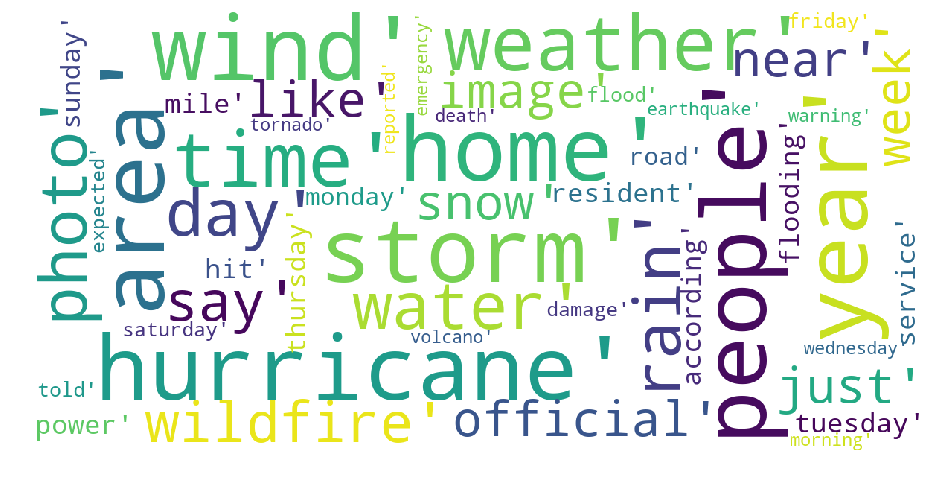

In [41]:
gen_wordcloud(top50words_disaster_1_list,
#               title='Top frequent words',
              filename='top50words_disaster_1_wordcloud.jpg'
             )

### Top 100 disaster words

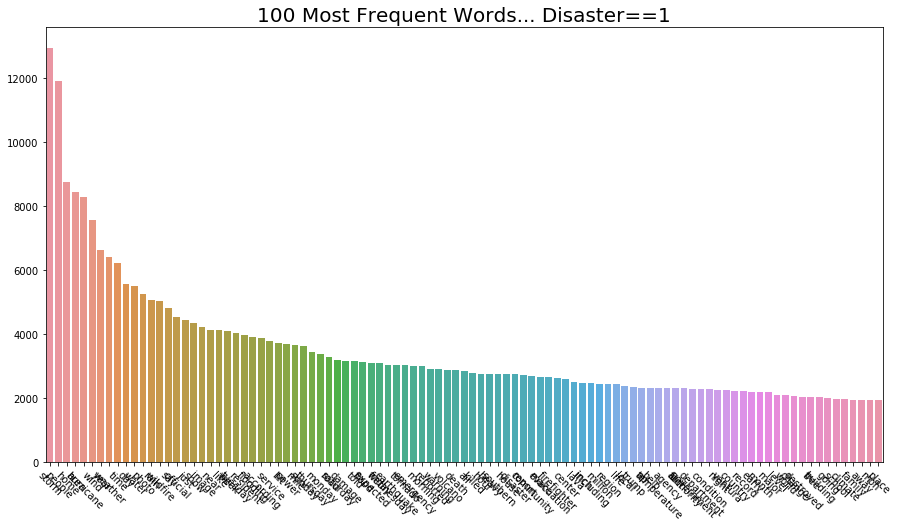

In [42]:
top100words_disaster_1 = ngram_bar_plot(df      = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 100,
                                       stopword_toggle = True,
                                       disaster = 1,
                                       filename = 'top100_most_freq_wds_disaster_1'
                                      )

In [43]:
top100words_disaster_1_list = list((top100words_disaster_1)[1])
top100words_disaster_1_list[:10]

['storm',
 'people',
 'home',
 'area',
 'hurricane',
 'wind',
 'year',
 'weather',
 'time',
 'day']

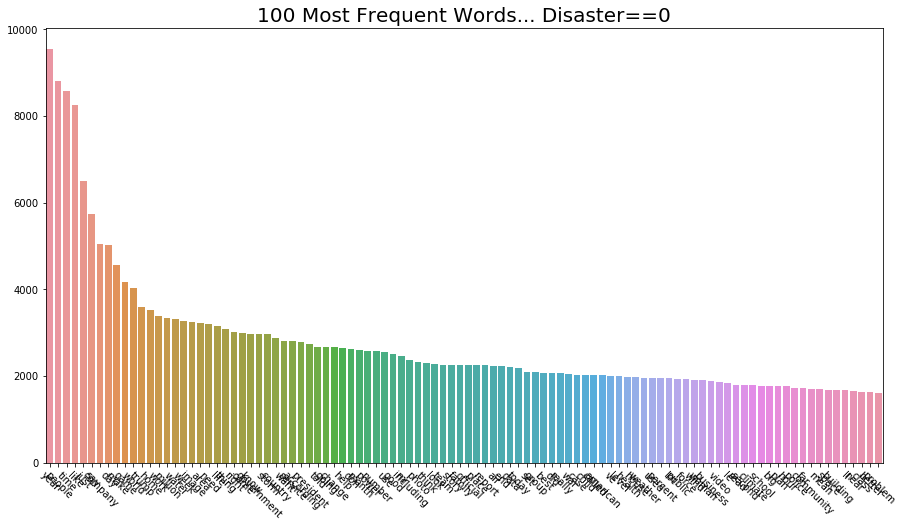

In [44]:
top100words_disaster_0 = ngram_bar_plot(df      = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 100,
                                       stopword_toggle = True,
                                       disaster = 0,
                                       filename = 'top100_most_freq_wds_disaster_0'
                                      )

In [45]:
top100words_disaster_0_list = list((top100words_disaster_0)[1])
top100words_disaster_0_list[:10]

['year',
 'people',
 'time',
 'like',
 'just',
 'say',
 'company',
 'day',
 'make',
 'game']

In [46]:
top100_words_overlap = [w for w in top100words_disaster_1_list if w in top100words_disaster_0_list]
top100_wd_overlap_percentage = len(top100_words_overlap)/len(top100words_disaster_1_list)

print(top100_wd_overlap_percentage)
print(top100_words_overlap[:10])

0.45454545454545453
['storm', 'people', 'home', 'area', 'wind', 'year', 'weather', 'time', 'day', 'water']


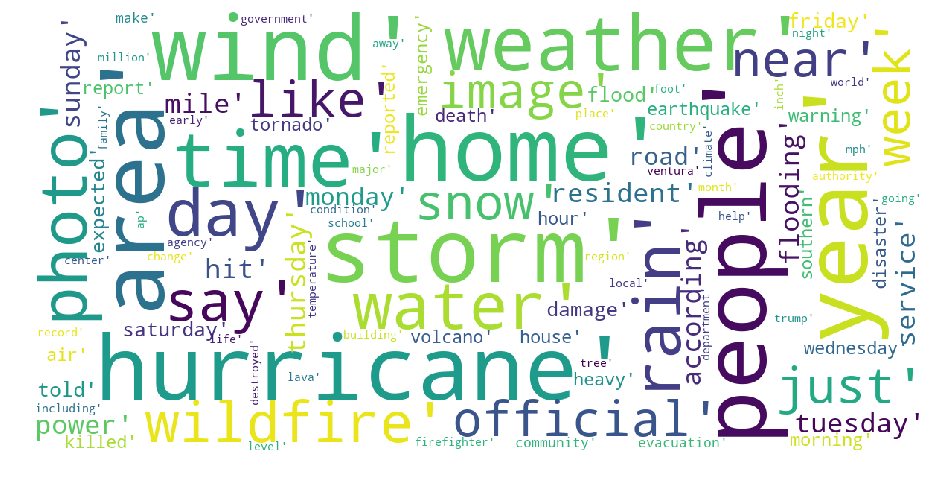

In [47]:
gen_wordcloud(top100words_disaster_1_list,
#               title='Top frequent words',
              filename='top100words_disaster_1_wordcloud.jpg'
             )

### Top 200 frequect disaster words

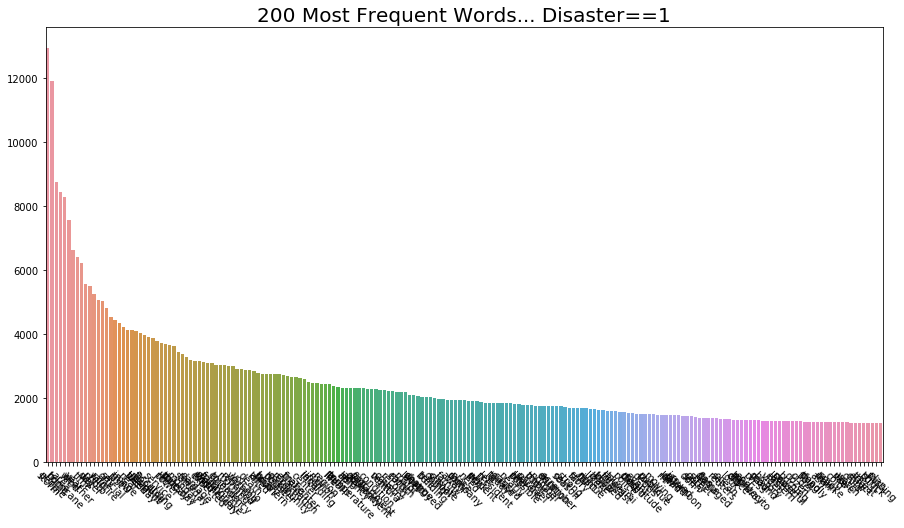

In [48]:
top200words_disaster_1 = ngram_bar_plot(df      = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 200,
                                       stopword_toggle = True,
                                       disaster = 1,
                                       filename = 'top200_most_freq_wds_disaster_1'
                                      )

In [49]:
top200words_disaster_1_list = list((top200words_disaster_1)[1])
top200words_disaster_1_list[:10]

['storm',
 'people',
 'home',
 'area',
 'hurricane',
 'wind',
 'year',
 'weather',
 'time',
 'day']

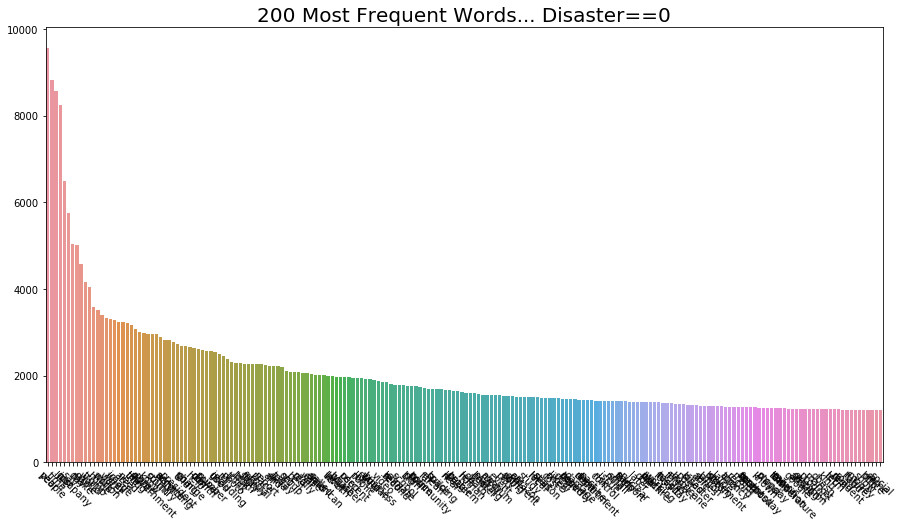

In [50]:
top200words_disaster_0 = ngram_bar_plot(df      = df,
                                       column   = df['words'],
                                       n_grams  = 1,
                                       n_words  = 200,
                                       stopword_toggle = True,
                                       disaster = 0,
                                       filename = 'top200_most_freq_wds_disaster_0'
                                      )

In [51]:
top200words_disaster_0_list = list((top200words_disaster_0)[1])
top200words_disaster_0_list[:10]

['year',
 'people',
 'time',
 'like',
 'just',
 'say',
 'company',
 'day',
 'make',
 'game']

In [52]:
top200_words_overlap = [w for w in top200words_disaster_1_list if w in top200words_disaster_0_list]
top200_wd_overlap_percentage = len(top200_words_overlap)/len(top200words_disaster_1_list)

print(top200_wd_overlap_percentage)
print(top200_words_overlap[:10])

0.5678391959798995
['storm', 'people', 'home', 'area', 'hurricane', 'wind', 'year', 'weather', 'time', 'day']


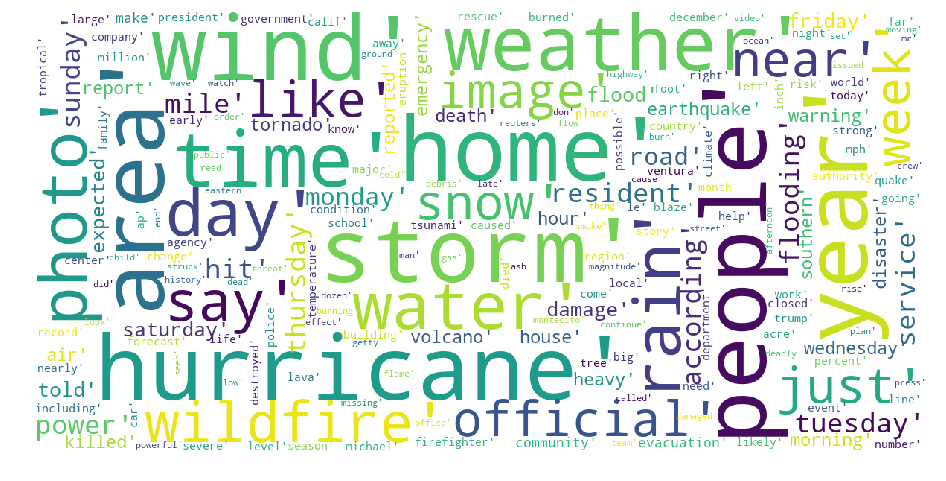

In [53]:
gen_wordcloud(top200words_disaster_1_list,
#               title='Top frequent words',
              filename='top200words_disaster_1_wordcloud.jpg'
             )